# Data Collection

In [ ]:
!wget http://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/overhang.zip

--2022-02-05 20:42:38--  http://www02.smt.ufrj.br/~offshore/mfs/database/mafaulda/overhang.zip
Resolving www02.smt.ufrj.br (www02.smt.ufrj.br)... 146.164.99.22
Connecting to www02.smt.ufrj.br (www02.smt.ufrj.br)|146.164.99.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3375143053 (3.1G) [application/zip]
Saving to: ‘overhang.zip’

overhang.zip        100%[===================>]   3.14G  11.1MB/s    in 5m 11s  

2022-02-05 20:47:52 (10.3 MB/s) - ‘overhang.zip’ saved [3375143053/3375143053]



In [ ]:
!mv /content/overhang.zip /content/drive/MyDrive/FYP_FINAL/OHBF

In [ ]:
!unzip /content/drive/MyDrive/FYP_FINAL/normal.zip
!unzip /content/drive/MyDrive/FYP_FINAL/OHBF/overhang.zip

unzip:  cannot find or open /content/drive/MyDrive/FYP_FINAL/normal.zip, /content/drive/MyDrive/FYP_FINAL/normal.zip.zip or /content/drive/MyDrive/FYP_FINAL/normal.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/FYP_FINAL/OHBF/overhang.zip, /content/drive/MyDrive/FYP_FINAL/OHBF/overhang.zip.zip or /content/drive/MyDrive/FYP_FINAL/OHBF/overhang.zip.ZIP.


# Imports & Functions

In [ ]:
# Installing libraries required
!pip install mat73
!pip install ewtpy
!pip install scaleogram

In [ ]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.io import loadmat
from scipy import signal
import mat73

import random
import pywt
import gc
import scaleogram as scg 

from skimage.transform import resize
from skimage import data, color
import ewtpy

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,Flatten,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

import itertools

from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.recurrent import LSTM
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Concatenate,Average



In [ ]:
def make_confusion_matrix(y_true,y_pred,classes=None, figsize=(10,10),text_size=15):
        """
        # Note: The following confusion matrix code is a remix of Scikit-Learn's 
        # plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
        # and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
        """
    
        cm = confusion_matrix(y_true, tf.round(y_pred))
        cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
        n_classes = cm.shape[0]

        fig, ax = plt.subplots(figsize=figsize)
        cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
        fig.colorbar(cax)

        if classes:
            labels = classes
        else:
            labels = np.arange(cm.shape[0])


        ax.set(title="Confusion Matrix",
                xlabel="Predicted label",
                ylabel="True label",
                xticks=np.arange(n_classes),
                yticks=np.arange(n_classes),
                xticklabels=labels,
                yticklabels=labels)

    
        ax.xaxis.set_label_position("bottom")
        ax.xaxis.tick_bottom()

        ax.xaxis.label.set_size(text_size)
        ax.yaxis.label.set_size(text_size)
        ax.title.set_size(text_size)

    
        threshold = (cm.max() + cm.min()) / 2.


        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                    horizontalalignment="center",
                    color="white" if cm[i, j] > threshold else "black",
                    size=text_size)

In [ ]:
cur_path = "/content/"
normal_path = glob.glob(cur_path+'/normal/*.csv',recursive=True)
OHBF_0_g_path = glob.glob(cur_path+'/overhang/ball_fault/0g/*.csv',recursive=True)
OHBF_6_g_path = glob.glob(cur_path+'/overhang/ball_fault/6g/*.csv',recursive=True)
OHBF_20_g_path = glob.glob(cur_path+'/overhang/ball_fault/20g/*.csv',recursive=True)
OHBF_35_g_path = glob.glob(cur_path+'/overhang/ball_fault/35g/*.csv',recursive=True)
OHCF_0_g_path = glob.glob(cur_path+'/overhang/cage_fault/0g/*.csv',recursive=True)
OHCF_6_g_path = glob.glob(cur_path+'/overhang/cage_fault/6g/*.csv',recursive=True)
OHCF_20_g_path = glob.glob(cur_path+'/overhang/cage_fault/20g/*.csv',recursive=True)
OHCF_35_g_path = glob.glob(cur_path+'/overhang/cage_fault/35g/*.csv',recursive=True)
OHOR_0_g_path = glob.glob(cur_path+'/overhang/outer_race/0g/*.csv',recursive=True)
OHOR_6_g_path = glob.glob(cur_path+'/overhang/outer_race/6g/*.csv',recursive=True)
OHOR_20_g_path = glob.glob(cur_path+'/overhang/outer_race/20g/*.csv',recursive=True)
OHOR_35_g_path = glob.glob(cur_path+'/overhang/outer_race/35g/*.csv',recursive=True)


In [ ]:
columns=["Tachometer signal","ax_UBA","r_UBA","tan_UBA","ax_OBA","r_OBA","tan_OBA","mic"]

## Visualisation and Downsampling

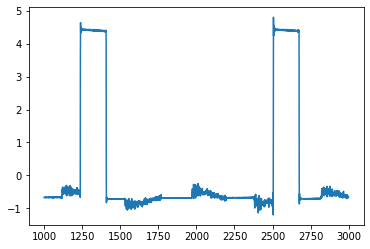

In [ ]:
pd.read_csv(normal_path[0],header=None)[1000:3000].iloc[:,0].plot()

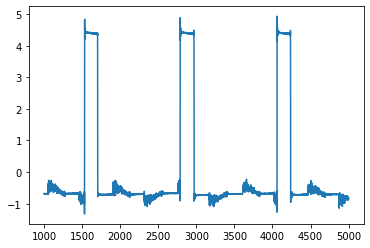

In [ ]:
pd.read_csv(OHBF_0_g_path[0],header=None)[1000:5000].iloc[:,0].plot()

In [ ]:
num_samples=5000
def resampler(path):
    data_n = pd.DataFrame()
    for i in path:
        _data = pd.read_csv(i,header=None).to_numpy()
        resampled_df=pd.DataFrame()
        for j in range(8):
          resample=pd.DataFrame(signal.resample(_data[:,j],num_samples))
          resampled_df=pd.concat([resampled_df,resample],axis=1,ignore_index=True)

        data_n = pd.concat([data_n,resampled_df],ignore_index=True)
    return data_n

In [ ]:
data_n = resampler(normal_path)
data_ohbf_0g = resampler(OHBF_0_g_path)
data_ohbf_6g = resampler(OHBF_6_g_path)
data_ohbf_20g = resampler(OHBF_20_g_path)
data_ohbf_35g = resampler(OHBF_35_g_path)
data_ohcf_0g = resampler(OHCF_0_g_path)
data_ohcf_6g = resampler(OHCF_6_g_path)
data_ohcf_20g = resampler(OHCF_20_g_path)
data_ohcf_35g = resampler(OHCF_35_g_path)
data_ohor_0g = resampler(OHOR_0_g_path)
data_ohor_6g = resampler(OHOR_6_g_path)
data_ohor_20g = resampler(OHOR_20_g_path)
data_ohor_35g = resampler(OHOR_35_g_path)

In [ ]:
data_n.shape,data_ohbf_0g.shape 

((245000, 8), (245000, 8))

In [ ]:
data_n.columns=columns
data_ohbf_0g.columns=columns
data_ohbf_6g.columns=columns
data_ohbf_20g.columns=columns
data_ohbf_35g.columns=columns
data_ohcf_0g.columns=columns
data_ohcf_6g.columns=columns
data_ohcf_20g.columns=columns
data_ohcf_35g.columns=columns
data_ohor_0g.columns=columns
data_ohor_6g.columns=columns
data_ohor_20g.columns=columns
data_ohor_35g.columns=columns

In [ ]:
data_n

,Tachometer signal,ax_UBA,r_UBA,tan_UBA,ax_OBA,r_OBA,tan_OBA,mic
0,1.904158,0.312482,-0.174182,0.034541,-0.724301,0.028461,-0.477083,0.010076
1,4.761134,-0.529935,-0.010200,-0.161503,-1.009662,0.015621,0.100592,0.041644
2,4.418019,-0.161226,0.543275,-0.036537,-0.464698,-0.039469,-0.022014,0.040874
3,1.137327,-0.425624,-0.056782,-0.031004,0.030334,0.004521,0.027514,0.012178
4,-1.298524,-0.073794,0.140850,-0.145012,-0.411596,-0.030032,-0.195551,-0.000346
...,...,...,...,...,...,...,...,...
244995,-0.529638,0.032279,-0.568222,0.174118,0.435962,0.028846,-0.156841,0.083259
244996,-0.880803,-0.285804,-0.434460,-0.236605,1.023757,-0.006635,-0.047429,0.113745
244997,-0.523198,0.442749,-0.204573,0.101110,0.279567,0.029926,-0.370877,-0.003161
244998,-0.865063,-0.908046,0.085197,0.186054,0.629472,-0.008743,-0.680751,0.032343


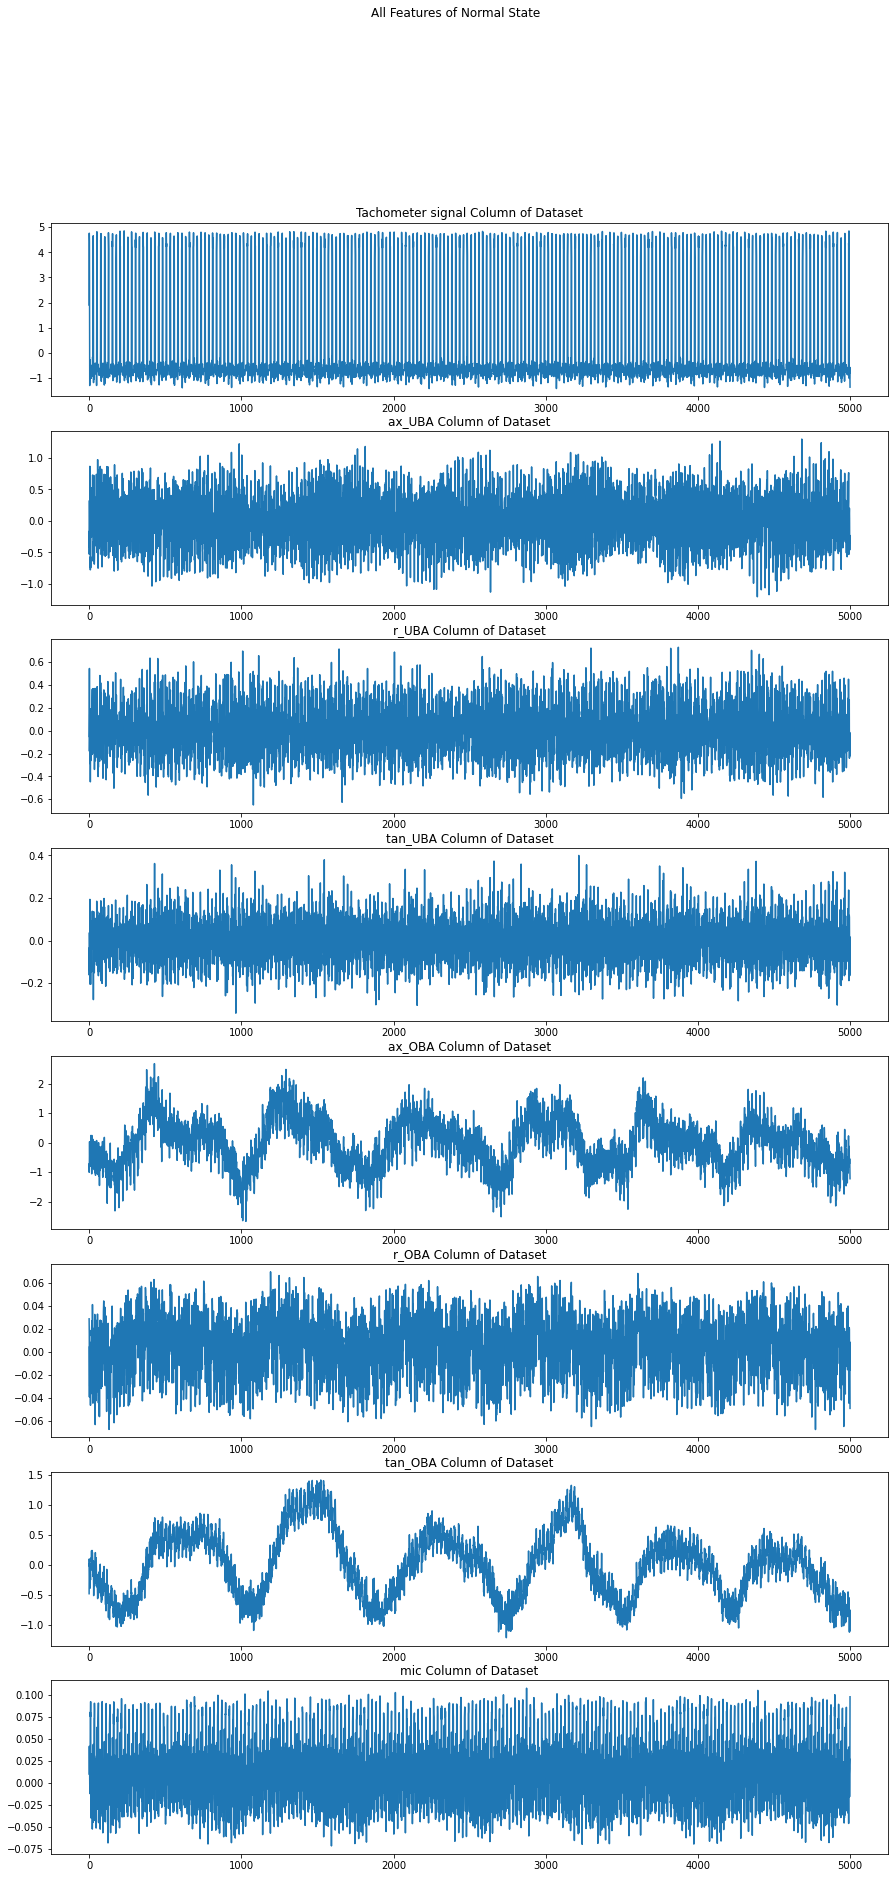

In [ ]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,30))
fig.suptitle('All Features of Normal State')
for i in range(len(data_n.columns)):
    axs[i].plot(data_n[columns[i]][:num_samples])
    axs[i].set_title('{} Column of Dataset'.format(columns[i]))

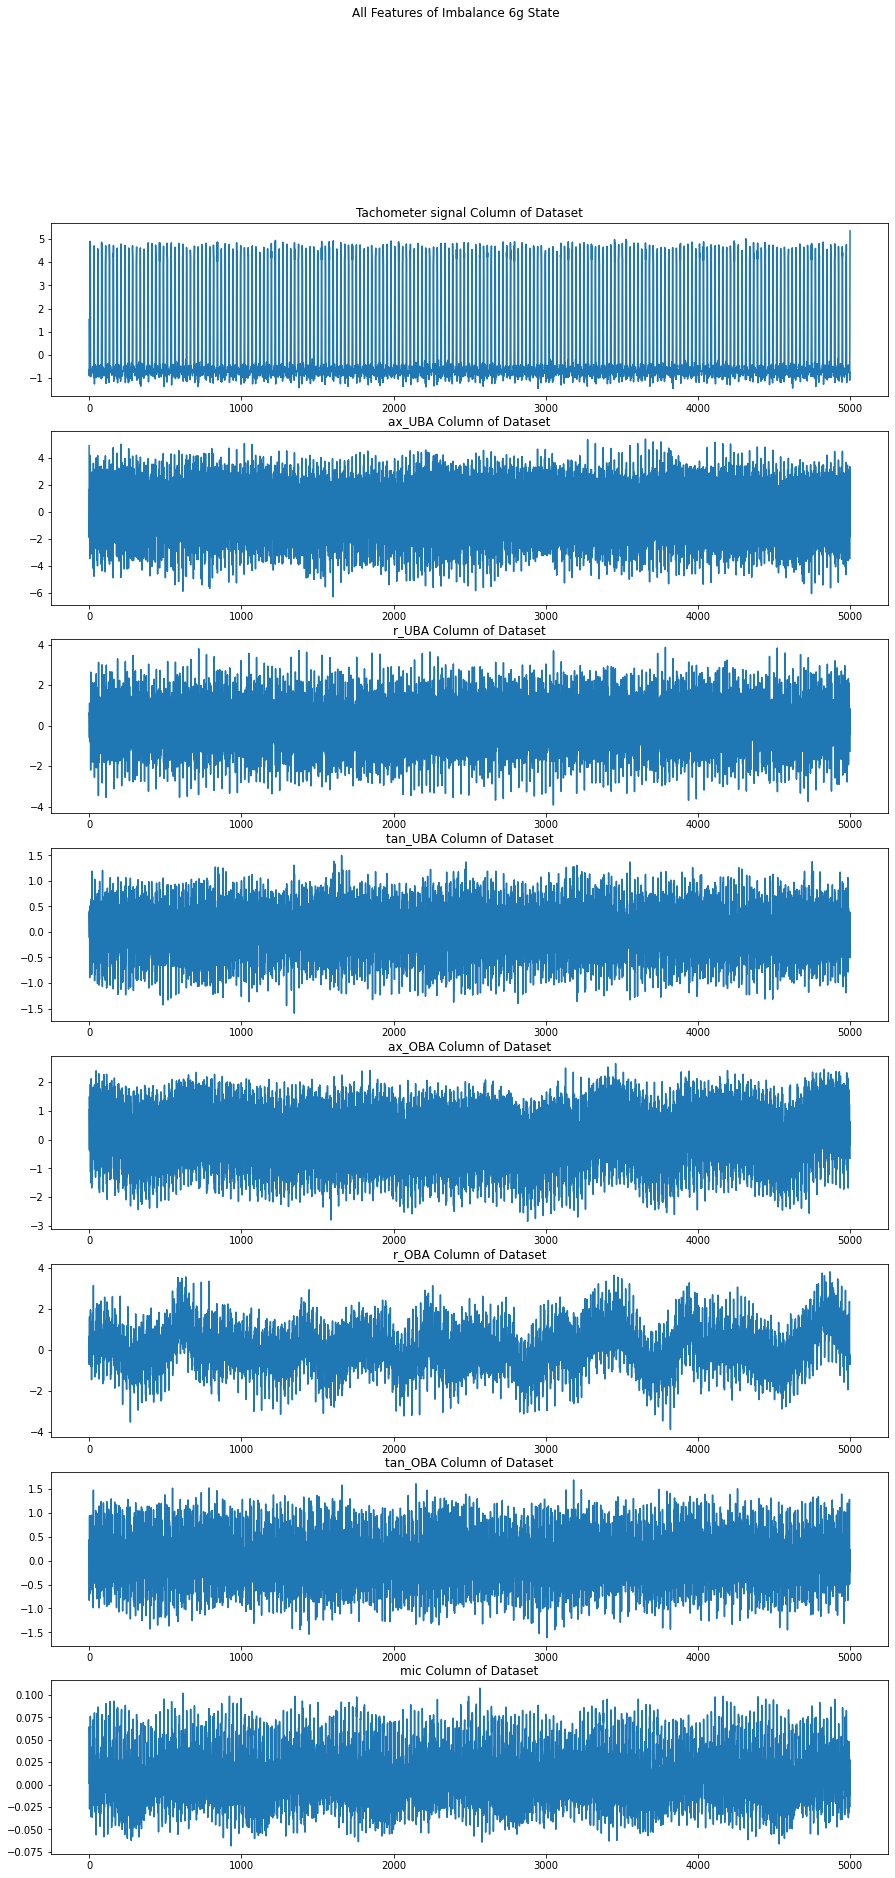

In [ ]:
fig, axs = plt.subplots(8, sharex=False, sharey=False,figsize=(15,30))
fig.suptitle('All Features of Imbalance 6g State')
for i in range(len(data_ohbf_0g.columns)):
    axs[i].plot(data_ohbf_0g[columns[i]][:num_samples])
    axs[i].set_title('{} Column of Dataset'.format(columns[i]))

# Data Preprocessing

In [ ]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245000 entries, 0 to 244999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Tachometer signal  245000 non-null  float64
 1   ax_UBA             245000 non-null  float64
 2   r_UBA              245000 non-null  float64
 3   tan_UBA            245000 non-null  float64
 4   ax_OBA             245000 non-null  float64
 5   r_OBA              245000 non-null  float64
 6   tan_OBA            245000 non-null  float64
 7   mic                245000 non-null  float64
dtypes: float64(8)
memory usage: 15.0 MB


Underhang


Weight (g)	Measurements
0	49
6	49
20	49
35	41
Total	188

Weight (g)	Measurements
0	49
6	49
20	49
35	41
Total	188


Weight (g)	Measurements
0	49
6	43
20 25
35	20
Total	137

 Normal	49

In [ ]:
x_0=data_n.to_numpy().reshape(-1,num_samples,8)
x_1=data_ohbf_0g.to_numpy().reshape(-1,num_samples,8)
x_2=data_ohbf_6g.to_numpy().reshape(-1,num_samples,8)
x_3=data_ohbf_20g.to_numpy().reshape(-1,num_samples,8)
x_4=data_ohbf_35g.to_numpy().reshape(-1,num_samples,8)
x_5=data_ohcf_0g.to_numpy().reshape(-1,num_samples,8)
x_6=data_ohcf_6g.to_numpy().reshape(-1,num_samples,8)
x_7=data_ohcf_20g.to_numpy().reshape(-1,num_samples,8)
x_8=data_ohcf_35g.to_numpy().reshape(-1,num_samples,8)
x_9=data_ohor_0g.to_numpy().reshape(-1,num_samples,8)
x_10=data_ohor_6g.to_numpy().reshape(-1,num_samples,8)
x_11=data_ohor_20g.to_numpy().reshape(-1,num_samples,8)
x_12=data_ohor_35g.to_numpy().reshape(-1,num_samples,8)

In [ ]:
X_data=np.vstack((x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12))
X_data.shape

(562, 5000, 8)

In [ ]:
y_0 = pd.DataFrame(np.zeros(int(len(x_0)),dtype=int))
y_1 = pd.DataFrame(np.ones(int(len(x_1)),dtype=int))
y_2 = pd.DataFrame(np.full((int(len(x_2)),1),2))
y_3 = pd.DataFrame(np.full((int(len(x_3)),1),3))
y_4 = pd.DataFrame(np.full((int(len(x_4)),1),4))
y_5 = pd.DataFrame(np.full((int(len(x_5)),1),5))
y_6 = pd.DataFrame(np.full((int(len(x_6)),1),6))
y_7 = pd.DataFrame(np.full((int(len(x_7)),1),7))
y_8 = pd.DataFrame(np.full((int(len(x_8)),1),8))
y_9 = pd.DataFrame(np.full((int(len(x_9)),1),9))
y_10 = pd.DataFrame(np.full((int(len(x_10)),1),10))
y_11 = pd.DataFrame(np.full((int(len(x_11)),1),11))
y_12 = pd.DataFrame(np.full((int(len(x_12)),1),12))






y_train_data = pd.concat([y_0,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12], ignore_index=True).to_numpy()

In [ ]:
y_train_data.shape

(562, 1)

In [ ]:
y_train_data=y_train_data.reshape(-1)

In [ ]:
y_train_data.shape

(562,)

In [ ]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_train_data, test_size=1 - train_ratio,stratify=y_train_data)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),stratify=y_test) 


In [ ]:
X_train.shape,X_test.shape,X_val.shape

((393, 5000, 8), (85, 5000, 8), (84, 5000, 8))

In [ ]:
y_train.shape,y_test.shape,y_val.shape

((393,), (85,), (84,))

In [ ]:
# Setting up data in terms of time data by swapping a frame over the signal
time_frame=1000 # 1 sec (for time frame of 1  sec of) ## Variable

time_interval=200 #0.2s shorter the better. But larger for easy computation ## Variable


X_train_rnn=np.array(np.ones((1,8)))
y_train_rnn=[]


count=0

for i in X_train:
  for j in range(time_frame//2,len(i)-time_frame//2,time_interval):
    X_train_rnn=np.vstack((X_train_rnn,i[j-time_frame//2:j+time_frame//2]))
    y_train_rnn.append(y_train[count])

  count+=1
  if count%50==0:
    print("Processed {} Train features ".format(count))
    print(X_train_rnn.shape)


Processed 50 Train features 
(1000001, 8)
Processed 100 Train features 
(2000001, 8)
Processed 150 Train features 
(3000001, 8)
Processed 200 Train features 
(4000001, 8)
Processed 250 Train features 
(5000001, 8)
Processed 300 Train features 
(6000001, 8)
Processed 350 Train features 
(7000001, 8)


In [ ]:
# Setting up data in terms of time data by swapping a frame over the signal
time_frame=1000 # 1 sec (for time frame of 1  sec of) ## Variable

time_interval=200 #0.2s shorter the better. But larger for easy computation ## Variable


X_test_rnn=np.array(np.ones((1,8)))
y_test_rnn=[]


count=0

for i in X_test:
  for j in range(time_frame//2,len(i)-time_frame//2,time_interval):
    X_test_rnn=np.vstack((X_test_rnn,i[j-time_frame//2:j+time_frame//2]))
    y_test_rnn.append(y_test[count])

  count+=1
  if count%50==0:
    print("Processed {} Test features ".format(count))
    print(X_test_rnn.shape)


Processed 50 Test features 
(1000001, 8)


In [ ]:
# Setting up data in terms of time data by swapping a frame over the signal
time_frame=1000 # 1 sec (for time frame of 1  sec of) ## Variable

time_interval=200 #0.2s shorter the better. But larger for easy computation ## Variable


X_val_rnn=np.array(np.ones((1,8)))
y_val_rnn=[]


count=0

for i in X_val:
  for j in range(time_frame//2,len(i)-time_frame//2,time_interval):
    X_val_rnn=np.vstack((X_val_rnn,i[j-time_frame//2:j+time_frame//2]))
    y_val_rnn.append(y_val[count])

  count+=1
  if count%50==0:
    print("Processed {} Val features ".format(count))
    print(X_val_rnn.shape)


Processed 50 Val features 
(1000001, 8)


In [ ]:
X_train_rnn.shape,X_test_rnn.shape,X_val_rnn.shape

((7860001, 8), (1700001, 8), (1680001, 8))

In [ ]:
X_train_rnn=X_train_rnn[1:,:].reshape(-1,time_frame,8)
X_test_rnn=X_test_rnn[1:,:].reshape(-1,time_frame,8)
X_val_rnn=X_val_rnn[1:,:].reshape(-1,time_frame,8)


In [ ]:
X_train_rnn.shape,X_test_rnn.shape,X_val_rnn.shape

((7860, 1000, 8), (1700, 1000, 8), (1680, 1000, 8))

In [ ]:
np.array(y_train_rnn).shape,np.array(y_test_rnn).shape,np.array(y_val_rnn).shape

((7860,), (1700,), (1680,))

In [ ]:
X_train=X_train_rnn
X_test=X_test_rnn
X_val=X_val_rnn

y_train=np.array(y_train_rnn)
y_test=np.array(y_test_rnn)
y_val=np.array(y_val_rnn)

In [ ]:
np.save("/content/drive/MyDrive/FYP_FINAL/OHBF/X_train",X_train)
np.save("/content/drive/MyDrive/FYP_FINAL/OHBF/X_test",X_test)
np.save("/content/drive/MyDrive/FYP_FINAL/OHBF/X_val",X_val)

np.save("/content/drive/MyDrive/FYP_FINAL/OHBF/y_train",y_train)
np.save("/content/drive/MyDrive/FYP_FINAL/OHBF/y_test",y_test)
np.save("/content/drive/MyDrive/FYP_FINAL/OHBF/y_val",y_val)

  

# Modelling

## CNN


In [ ]:
X_train=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_train.npy")
X_test=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_test.npy")
X_val=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_val.npy")

y_train=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_train.npy")
y_test=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_test.npy")
y_val=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_val.npy")


In [ ]:
X_train.shape,X_test.shape,X_val.shape

((7860, 1000, 8), (1700, 1000, 8), (1680, 1000, 8))

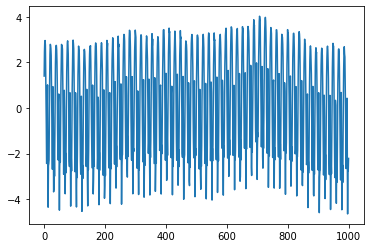

In [ ]:
i=500
j=4
signal=X_train[i,:,j]
plt.plot(signal)

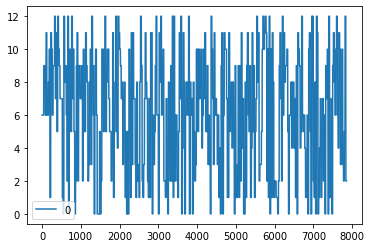

In [ ]:
pd.DataFrame(np.array(y_train)).plot()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
 

In [ ]:
num_classes=13
n_timesteps=1000
n_features=8

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)

In [ ]:
batch_size = 16
epochs =100

train_size = X_train.shape[0]
val_size=X_val.shape[0]
test_size= X_test.shape[0]

In [ ]:
alpha = 0.35
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha), input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha)))
model.add(Dropout(0.3))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 999, 128)          2176      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 499, 128)         0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 498, 64)           16448     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 249, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 248, 32)           4128      
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 124, 32)         

In [ ]:
checkpoint=ModelCheckpoint("/content/trained_model/hma_base_CNN.hd5",monitor="val_loss",mode="min",
                           save_best_only=True,verbose=1)

earlystop=EarlyStopping(monitor="val_loss",min_delta=0,patience=20,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=5,verbose=1,min_delta=0.0001)

callbacks=[checkpoint,earlystop,reduce_lr]

In [ ]:
model.fit(X_train, y_train,steps_per_epoch=train_size//batch_size,
          batch_size=batch_size,
          epochs=epochs, validation_steps=val_size//batch_size,
          validation_data=(X_val, y_val),
          callbacks=callbacks)

Epoch 1/100
491/491 [==============================] - ETA: 0s - loss: 1.2752 - accuracy: 0.5179
Epoch 1: val_loss improved from inf to 0.64370, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


491/491 [==============================] - 13s 23ms/step - loss: 1.2752 - accuracy: 0.5179 - val_loss: 0.6437 - val_accuracy: 0.7685 - lr: 0.0010
Epoch 2/100
489/491 [============================>.] - ETA: 0s - loss: 0.4952 - accuracy: 0.8198
Epoch 2: val_loss improved from 0.64370 to 0.39857, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


491/491 [==============================] - 8s 17ms/step - loss: 0.4945 - accuracy: 0.8202 - val_loss: 0.3986 - val_accuracy: 0.8381 - lr: 0.0010
Epoch 3/100
486/491 [============================>.] - ETA: 0s - loss: 0.3184 - accuracy: 0.8805
Epoch 3: val_loss did not improve from 0.39857
491/491 [==============================] - 5s 10ms/step - loss: 0.3178 - accuracy: 0.8808 - val_loss: 0.5882 - val_accuracy: 0.7994 - lr: 0.0010
Epoch 4/100
488/491 [============================>.] - ETA: 0s - loss: 0.2713 - accuracy: 0.9064
Epoch 4: val_loss improved from 0.39857 to 0.31839, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


491/491 [==============================] - 7s 14ms/step - loss: 0.2718 - accuracy: 0.9062 - val_loss: 0.3184 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 5/100
487/491 [============================>.] - ETA: 0s - loss: 0.1876 - accuracy: 0.9347
Epoch 5: val_loss improved from 0.31839 to 0.21324, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


491/491 [==============================] - 7s 14ms/step - loss: 0.1875 - accuracy: 0.9346 - val_loss: 0.2132 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 6/100
487/491 [============================>.] - ETA: 0s - loss: 0.1793 - accuracy: 0.9451
Epoch 6: val_loss did not improve from 0.21324
491/491 [==============================] - 5s 11ms/step - loss: 0.1798 - accuracy: 0.9451 - val_loss: 0.3092 - val_accuracy: 0.9048 - lr: 0.0010
Epoch 7/100
487/491 [============================>.] - ETA: 0s - loss: 0.1629 - accuracy: 0.9440
Epoch 7: val_loss improved from 0.21324 to 0.18642, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


491/491 [==============================] - 7s 14ms/step - loss: 0.1639 - accuracy: 0.9440 - val_loss: 0.1864 - val_accuracy: 0.9155 - lr: 0.0010
Epoch 8/100
486/491 [============================>.] - ETA: 0s - loss: 0.2093 - accuracy: 0.9384
Epoch 8: val_loss did not improve from 0.18642
491/491 [==============================] - 5s 11ms/step - loss: 0.2137 - accuracy: 0.9380 - val_loss: 0.3450 - val_accuracy: 0.8738 - lr: 0.0010
Epoch 9/100
490/491 [============================>.] - ETA: 0s - loss: 0.1282 - accuracy: 0.9598
Epoch 9: val_loss improved from 0.18642 to 0.09785, saving model to /content/trained_model/hma_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


491/491 [==============================] - 7s 14ms/step - loss: 0.1280 - accuracy: 0.9597 - val_loss: 0.0979 - val_accuracy: 0.9619 - lr: 0.0010
Epoch 10/100
487/491 [============================>.] - ETA: 0s - loss: 0.0801 - accuracy: 0.9738
Epoch 10: val_loss did not improve from 0.09785
491/491 [==============================] - 5s 10ms/step - loss: 0.0796 - accuracy: 0.9740 - val_loss: 0.4992 - val_accuracy: 0.8893 - lr: 0.0010
Epoch 11/100
490/491 [============================>.] - ETA: 0s - loss: 0.1402 - accuracy: 0.9605
Epoch 11: val_loss did not improve from 0.09785
491/491 [==============================] - 5s 10ms/step - loss: 0.1399 - accuracy: 0.9606 - val_loss: 0.2404 - val_accuracy: 0.9202 - lr: 0.0010
Epoch 12/100
487/491 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.9523
Epoch 12: val_loss did not improve from 0.09785
491/491 [==============================] - 5s 10ms/step - loss: 0.1908 - accuracy: 0.9521 - val_loss: 0.3651 - val_accuracy: 0.

INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/hma_base_CNN.hd5/assets


491/491 [==============================] - 7s 14ms/step - loss: 0.0810 - accuracy: 0.9762 - val_loss: 0.0885 - val_accuracy: 0.9637 - lr: 0.0010
Epoch 14/100
491/491 [==============================] - ETA: 0s - loss: 0.0609 - accuracy: 0.9796
Epoch 14: val_loss did not improve from 0.08849
491/491 [==============================] - 5s 10ms/step - loss: 0.0609 - accuracy: 0.9796 - val_loss: 0.1560 - val_accuracy: 0.9446 - lr: 0.0010
Epoch 15/100
488/491 [============================>.] - ETA: 0s - loss: 0.1284 - accuracy: 0.9695
Epoch 15: val_loss did not improve from 0.08849
491/491 [==============================] - 5s 10ms/step - loss: 0.1306 - accuracy: 0.9691 - val_loss: 0.3187 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 16/100
488/491 [============================>.] - ETA: 0s - loss: 0.1380 - accuracy: 0.9663
Epoch 16: val_loss did not improve from 0.08849
491/491 [==============================] - 5s 10ms/step - loss: 0.1373 - accuracy: 0.9663 - val_loss: 0.2093 - val_accuracy: 0.

In [ ]:
class_names=["healthy","ohbf0","ohbf6","ohbf20","ohbf35","ohcf0","ohcf6","ohcf20","ohcf35","ohor0","ohor6","ohor20","ohor35"]

In [ ]:
y_pred_probs=model.predict(X_test)
y_true=np.argmax(y_test,axis=1)

In [ ]:
y_pred=np.argmax(y_pred_probs,axis=1)

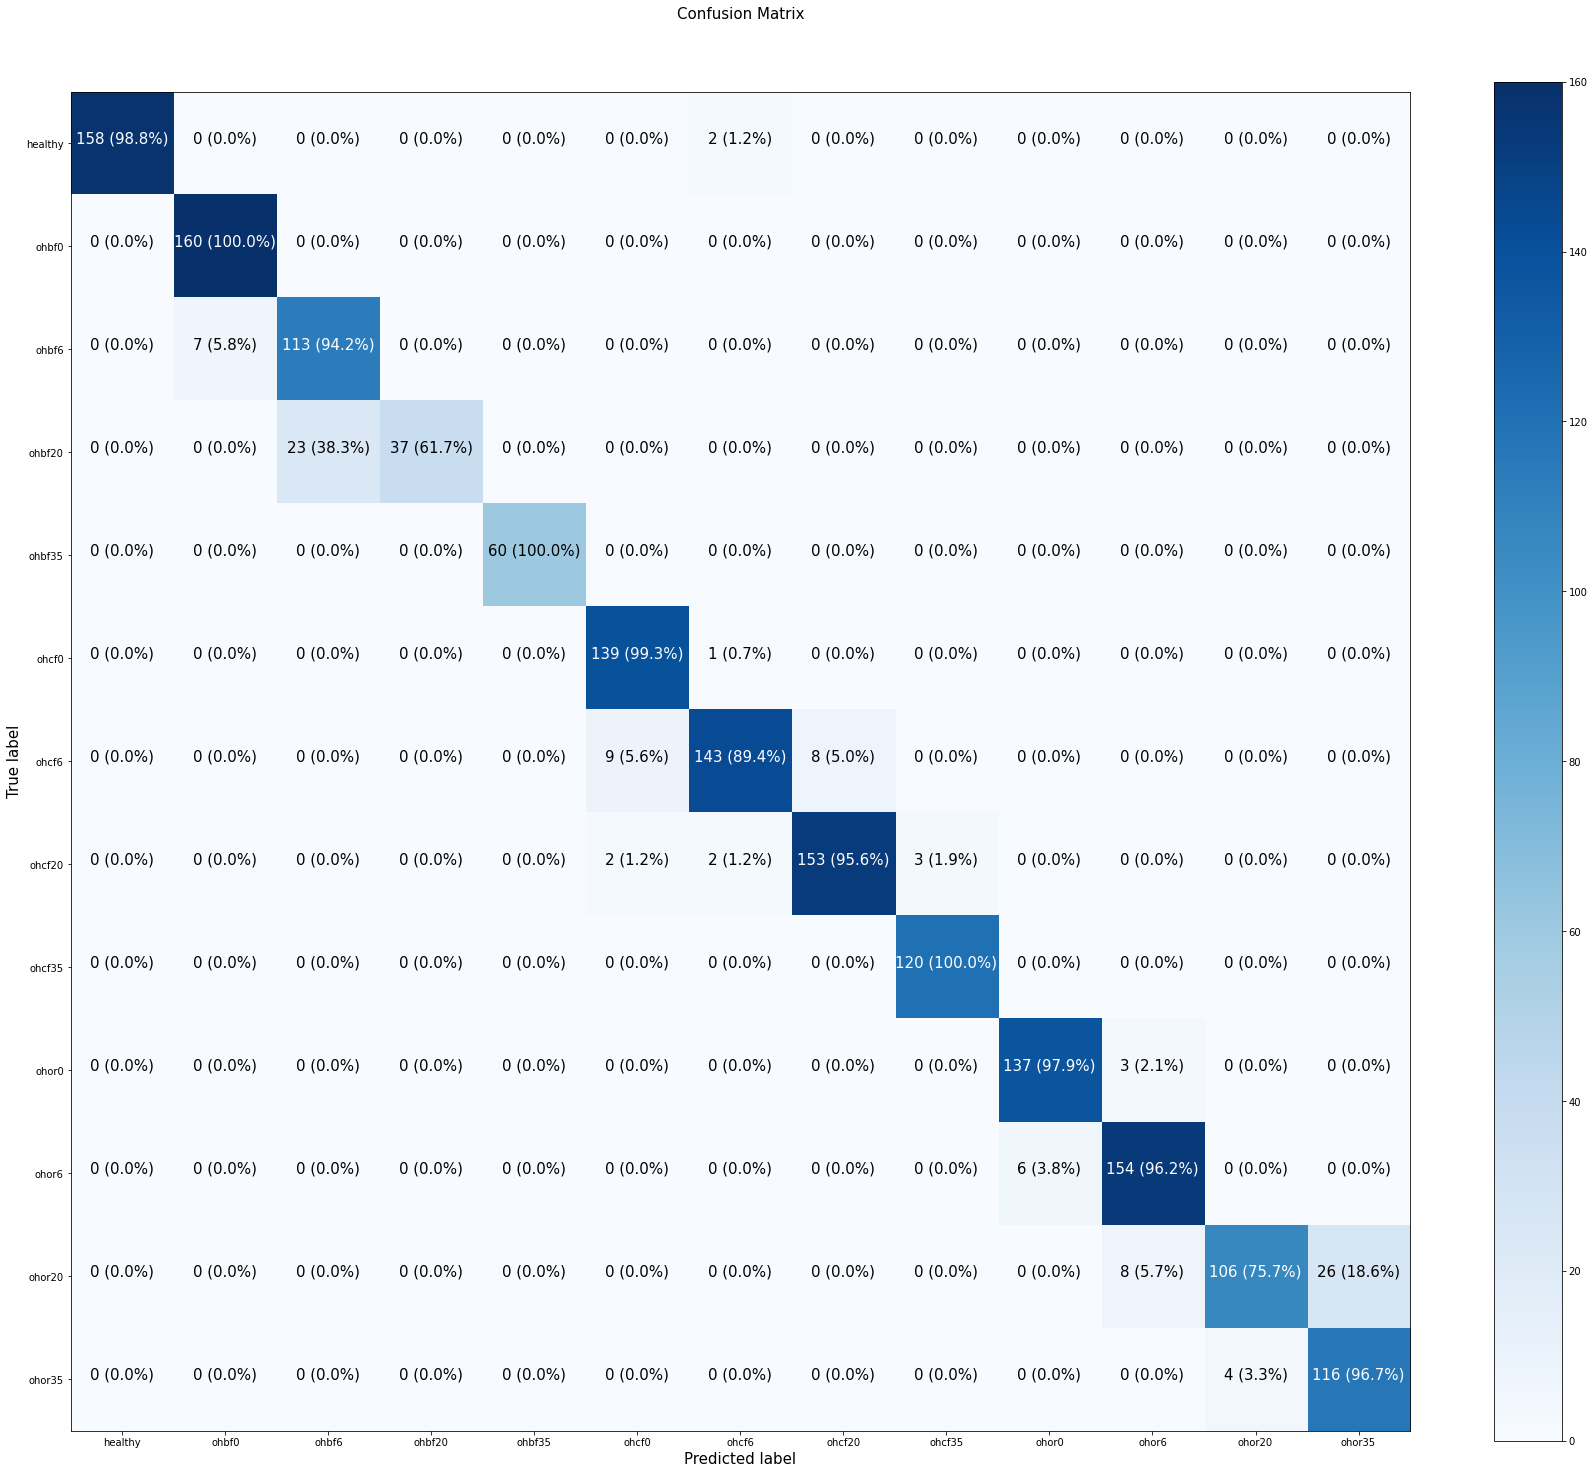

In [ ]:
make_confusion_matrix(y_true,y_pred,classes=class_names,figsize=(30,25))

In [ ]:
print(classification_report(y_true,y_pred,target_names=class_names))


              precision    recall  f1-score   support

     healthy       1.00      0.99      0.99       160
       ohbf0       0.96      1.00      0.98       160
       ohbf6       0.83      0.94      0.88       120
      ohbf20       1.00      0.62      0.76        60
      ohbf35       1.00      1.00      1.00        60
       ohcf0       0.93      0.99      0.96       140
       ohcf6       0.97      0.89      0.93       160
      ohcf20       0.95      0.96      0.95       160
      ohcf35       0.98      1.00      0.99       120
       ohor0       0.96      0.98      0.97       140
       ohor6       0.93      0.96      0.95       160
      ohor20       0.96      0.76      0.85       140
      ohor35       0.82      0.97      0.89       120

    accuracy                           0.94      1700
   macro avg       0.94      0.93      0.93      1700
weighted avg       0.94      0.94      0.94      1700



In [ ]:
model.evaluate(X_test,y_test)

54/54 [==============================] - 1s 9ms/step - loss: 0.1919 - accuracy: 0.9388


[0.19188733398914337, 0.9388235211372375]

In [ ]:
!zip -r /content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_cnn_trained_model_apr.zip /content/trained_model

  adding: content/trained_model/ (stored 0%)
  adding: content/trained_model/ohbf_base_CNN.hd5/ (stored 0%)
  adding: content/trained_model/ohbf_base_CNN.hd5/saved_model.pb (deflated 89%)
  adding: content/trained_model/ohbf_base_CNN.hd5/keras_metadata.pb (deflated 92%)
  adding: content/trained_model/ohbf_base_CNN.hd5/assets/ (stored 0%)
  adding: content/trained_model/ohbf_base_CNN.hd5/variables/ (stored 0%)
  adding: content/trained_model/ohbf_base_CNN.hd5/variables/variables.data-00000-of-00001 (deflated 31%)
  adding: content/trained_model/ohbf_base_CNN.hd5/variables/variables.index (deflated 66%)


## EWT + CNN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_train.npy")
X_test=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_test.npy")
X_val=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_val.npy")

y_train=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_train.npy")
y_test=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_test.npy")
y_val=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_val.npy")


In [ ]:
X_train.shape,X_test.shape,X_val.shape

((7860, 1000, 8), (1700, 1000, 8), (1680, 1000, 8))

In [ ]:
y_train.shape,y_test.shape,y_val.shape

((7860,), (1700,), (1680,))

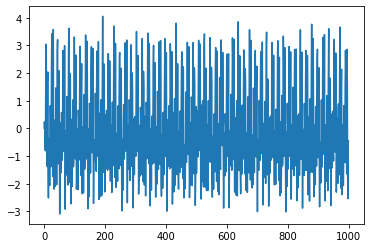

In [ ]:
i=500
j=1
signal=X_train[i,:,j]
plt.plot(signal)

In [ ]:
# Standardising and applying ewt transform
scaler=StandardScaler()
ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(signal.reshape(-1,1)).reshape(-1),N=201)

In [ ]:
ewt.shape

(1000, 201)

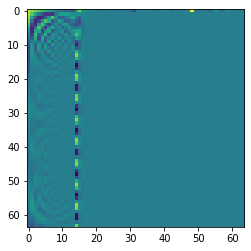

In [ ]:
plt.imshow(resize(ewt,(64,64)))

In [ ]:
train_size = X_train.shape[0]
val_size=X_val.shape[0]
test_size= X_test.shape[0]

In [ ]:
# Runtime is approx  10 hrs
train_data_ewt = np.ndarray(shape=(train_size, 64, 64, 8))
train_data_ewt = np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_train_data_ewt_epoch5999.npy")

for i in range(5950,train_size):
    if i%40 == 0:
        print("Processsing {}/{} features".format(i,train_size))
    if (i+1) % 200 == 0:
        print("Saving {}/{} features".format(i,train_size))
        np.save('/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_train_data_ewt_epoch{}'.format(i),train_data_ewt)
    for j in range(0,8):
        ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(X_train[i,:,j].reshape(-1,1)).reshape(-1), N = 201)
        train_data_ewt[i, :, :, j] = resize(ewt, (64, 64))

In [ ]:
np.save('/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_train_data_ewt_full',train_data_ewt)

In [ ]:
# Takes 130 mins
val_data_ewt = np.ndarray(shape=(val_size, 64, 64, 8))
val_data_ewt = np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_val_data_ewt_epoch1399.npy")

for i in range(1380,val_size):
    if i%40 == 0:
        print("Processsing {}/{} features".format(i,val_size))
    if (i+1) % 200 == 0:
        print("Saving {}/{} features".format(i,val_size))
        np.save('/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_val_data_ewt_epoch{}'.format(i),val_data_ewt)
    for j in range(0,8):
        ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(X_val[i,:,j].reshape(-1,1)).reshape(-1), N = 500)
        val_data_ewt[i, :, :, j] = resize(ewt, (64, 64))

Saving 1399/1680 features
Processsing 1400/1680 features
Processsing 1440/1680 features
Processsing 1480/1680 features
Processsing 1520/1680 features
Processsing 1560/1680 features
Saving 1599/1680 features
Processsing 1600/1680 features
Processsing 1640/1680 features


In [ ]:
np.save('/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_val_data_ewt_full',val_data_ewt)

In [ ]:
# Takes 130 mins
test_data_ewt = np.ndarray(shape=(test_size, 64, 64, 8))
test_data_ewt = np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_test_data_ewt_epoch199.npy")

for i in range(180,test_size):
    if i%40 == 0:
        print("Processsing {}/{} features".format(i,test_size))
    if (i+1) % 200 == 0:
        print("Saving {}/{} features".format(i,test_size))
        np.save('/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_test_data_ewt_epoch{}'.format(i),test_data_ewt)
    for j in range(0,8):
        ewt,  _ ,_ = ewtpy.EWT1D(scaler.fit_transform(X_test[i,:,j].reshape(-1,1)).reshape(-1), N = 500)
        test_data_ewt[i, :, :, j] = resize(ewt, (64, 64))

Saving 199/1700 features
Processsing 200/1700 features
Processsing 240/1700 features
Processsing 280/1700 features
Processsing 320/1700 features
Processsing 360/1700 features
Saving 399/1700 features
Processsing 400/1700 features
Processsing 440/1700 features
Processsing 480/1700 features
Processsing 520/1700 features
Processsing 560/1700 features
Saving 599/1700 features
Processsing 600/1700 features
Processsing 640/1700 features
Processsing 680/1700 features
Processsing 720/1700 features
Processsing 760/1700 features
Saving 799/1700 features
Processsing 800/1700 features
Processsing 840/1700 features
Processsing 880/1700 features
Processsing 920/1700 features
Processsing 960/1700 features
Saving 999/1700 features
Processsing 1000/1700 features
Processsing 1040/1700 features
Processsing 1080/1700 features
Processsing 1120/1700 features
Processsing 1160/1700 features
Saving 1199/1700 features
Processsing 1200/1700 features
Processsing 1240/1700 features
Processsing 1280/1700 features
P

In [ ]:
np.save('/content/drive/MyDrive/FYP_FINAL/OHBF/ohbf_test_data_ewt_full',test_data_ewt)